<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/5_2_%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B2%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D1%8F_Bahdanau_%D0%B8_Luong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Модели внимания Bahdanau и Luong
#Модель внимания Bahdanau

Модель внимания Bahdanau (или модель soft attention) была предложена Дзяфрагмом Баданау (Dzmitry Bahdanau) и его коллегами в 2015 году в статье "Neural Machine Translation by Jointly Learning to Align and Translate". Она направлена на решение проблемы длинных зависимостей в задачах машинного перевода, улучшая традиционные рекуррентные нейронные сети (RNN), которые теряли важную информацию при обработке длинных последовательностей.

Основной идеей механизма внимания является выделение наиболее важных частей входной последовательности для каждого элемента выходной последовательности.

### Модель машинного перевода с механизмом внимания

Модель Bahdanau включает две основные части:
1. **Кодировщик** (encoder), который обрабатывает входную последовательность.
2. **Декодировщик** (decoder), который генерирует выходную последовательность.

#### Кодировщик

Кодировщик — это RNN (например, LSTM или GRU), которая обрабатывает последовательность входных токенов. Пусть входная последовательность представлена как:

$$
X = (x_1, x_2, \dots, x_T)
$$

где $x_i$ — это вектор представления i-го токена во входной последовательности, а $T$ — длина последовательности.

Кодировщик генерирует скрытые состояния для каждого элемента входной последовательности:

$$
h_t = \text{RNN}(h_{t-1}, x_t)
$$

где $h_t$ — это скрытое состояние на шаге $t$, зависящее от предыдущего состояния $h_{t-1}$ и текущего входа $x_t$.

Итоговые скрытые состояния кодировщика $H = (h_1, h_2, \dots, h_T)$ будут использоваться декодировщиком для генерации выходной последовательности с учетом механизма внимания.

#### Декодировщик

Декодировщик также является RNN и генерирует последовательность выходных токенов $Y = (y_1, y_2, \dots, y_N)$, где $y_j$ — это сгенерированный токен на шаге $j$, а $N$ — длина выходной последовательности. Основное отличие модели Bahdanau от традиционного декодера состоит в использовании механизма внимания, который позволяет декодеру сосредоточиться на релевантных частях входной последовательности при каждом шаге.

На каждом шаге декодирования декодер обновляет своё скрытое состояние:

$$
s_j = \text{RNN}(s_{j-1}, y_{j-1}, c_j)
$$

где $s_j$ — скрытое состояние декодера на шаге $j$, $y_{j-1}$ — предыдущий сгенерированный токен, а $c_j$ — контекстный вектор, который кодирует информацию о входной последовательности и вычисляется с использованием механизма внимания.

#### Механизм внимания

Для каждого шага декодирования $j$ контекстный вектор $c_j$ представляет собой взвешенную сумму скрытых состояний кодировщика:

$$
c_j = \sum_{t=1}^{T} \alpha_{jt} h_t
$$

где $\alpha_{jt}$ — это вес внимания, который определяет, насколько важно скрытое состояние кодировщика $h_t$ для генерации выходного токена $y_j$.

##### Вычисление весов внимания

Вес внимания $\alpha_{jt}$ вычисляется через так называемую **оценочную функцию внимания** (alignment function), которая сопоставляет текущее скрытое состояние декодера $s_{j-1}$ и скрытое состояние кодировщика $h_t$. В модели Bahdanau оценочная функция основана на нейронной сети и выглядит следующим образом:

$$
e_{jt} = v_a^\top \tanh(W_a s_{j-1} + U_a h_t)
$$

где:
- $e_{jt}$ — это ненормализованная оценка внимания (оценка важности состояния $h_t$ для текущего шага декодера),
- $W_a$ и $U_a$ — обучаемые матрицы весов,
- $v_a$ — обучаемый вектор.

Далее оценка внимания нормализуется с помощью softmax:

$$
\alpha_{jt} = \frac{\exp(e_{jt})}{\sum_{t'=1}^{T} \exp(e_{jt'})}
$$

Таким образом, веса внимания $\alpha_{jt}$ нормализуются так, что их сумма по всем шагам $t$ будет равна единице:

$$
\sum_{t=1}^{T} \alpha_{jt} = 1
$$

#### Генерация выхода

На каждом шаге декодирования декодер обновляет своё скрытое состояние $s_j$ с учетом предыдущего состояния $s_{j-1}$, предыдущего сгенерированного токена $y_{j-1}$ и контекстного вектора $c_j$. Затем сгенерированный выходной токен $y_j$ вычисляется с помощью функции, которая обычно является линейной трансформацией скрытого состояния декодера:

$$
y_j = \text{argmax}(\text{softmax}(W_o s_j + b_o))
$$

где $W_o$ и $b_o$ — обучаемые параметры линейной трансформации.

### Общий алгоритм

1. **Кодировщик**: Пропустить входную последовательность $X = (x_1, x_2, \dots, x_T)$ через RNN и получить скрытые состояния $H = (h_1, h_2, \dots, h_T)$.
2. **Инициализация декодера**: Инициализировать декодер начальным состоянием $s_0$.
3. Для каждого шага $j = 1, 2, \dots, N$ (где $N$ — длина выходной последовательности):
   - Вычислить веса внимания $\alpha_{jt}$ для каждого состояния кодировщика $h_t$, используя текущее состояние декодера $s_{j-1}$.
   - Вычислить контекстный вектор $c_j$ как взвешенную сумму скрытых состояний кодировщика.
   - Обновить состояние декодера $s_j = \text{RNN}(s_{j-1}, y_{j-1}, c_j)$.
   - Сгенерировать выходной токен $y_j$, используя текущее состояние декодера $s_j$.

### Преимущества модели внимания

1. **Гибкость в обработке длинных последовательностей**: Механизм внимания позволяет модели фокусироваться на разных частях входной последовательности, улучшая обработку длинных текстов.
2. **Интерпретируемость**: Веса внимания $\alpha_{jt}$ позволяют интерпретировать, какие части входного текста наиболее важны для генерации каждого выходного токена.
3. **Эффективное обучение**: В отличие от классических RNN, модель внимания Bahdanau позволяет быстрее и эффективнее обучаться на задачах с длинными зависимостями.


Для того чтобы продемонстрировать, как работает модель Bahdanau на конкретном примере, давай рассмотрим следующую задачу: у нас есть входная последовательность из трёх элементов, и нам нужно сгенерировать выходную последовательность длиной два элемента. Для простоты используем небольшие векторы и округлим значения.

### Заданные параметры

1. Входная последовательность $X = (x_1, x_2, x_3)$, где:
   - $x_1 = [1, 0]$
   - $x_2 = [0, 1]$
   - $x_3 = [1, 1]$
   
2. Исходные скрытые состояния кодировщика $H = (h_1, h_2, h_3)$, где:
   - $h_1 = [0.5, 0.2]$
   - $h_2 = [0.1, 0.4]$
   - $h_3 = [0.3, 0.8]$

3. Начальное состояние декодера $s_0 = [0.0, 0.0]$.

4. Параметры внимания:
   - $W_a = \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}$
   - $U_a = \begin{bmatrix} 0.1 & 0.0 \\ 0.0 & 0.1 \end{bmatrix}$
   - $v_a = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

### Шаг 1: Вычисление весов внимания для первого выхода ($y_1$)

На первом шаге декодирования мы используем начальное состояние декодера $s_0 = [0.0, 0.0]$ для вычисления весов внимания $\alpha_{1t}$ для каждого скрытого состояния кодировщика $h_t$, где $t = 1, 2, 3$.

#### Для $h_1$:
$$
e_{11} = v_a^\top \tanh(W_a s_0 + U_a h_1) = \begin{bmatrix} 1 & 1 \end{bmatrix}^\top \tanh \left( \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.1 & 0.0 \\ 0.0 & 0.1 \end{bmatrix} \begin{bmatrix} 0.5 \\ 0.2 \end{bmatrix} \right)
$$

$$
= \begin{bmatrix} 1 & 1 \end{bmatrix}^\top \tanh \left( \begin{bmatrix} 0.05 \\ 0.02 \end{bmatrix} \right) = 1 \times \tanh(0.05) + 1 \times \tanh(0.02) \approx 1 \times 0.05 + 1 \times 0.02 = 0.07
$$

#### Для $h_2$:
$$
e_{12} = v_a^\top \tanh(W_a s_0 + U_a h_2) = \begin{bmatrix} 1 & 1 \end{bmatrix}^\top \tanh \left( \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.1 & 0.0 \\ 0.0 & 0.1 \end{bmatrix} \begin{bmatrix} 0.1 \\ 0.4 \end{bmatrix} \right)
$$

$$
= \begin{bmatrix} 1 & 1 \end{bmatrix}^\top \tanh \left( \begin{bmatrix} 0.01 \\ 0.04 \end{bmatrix} \right) = 1 \times \tanh(0.01) + 1 \times \tanh(0.04) \approx 1 \times 0.01 + 1 \times 0.04 = 0.05
$$

#### Для $h_3$:
$$
e_{13} = v_a^\top \tanh(W_a s_0 + U_a h_3) = \begin{bmatrix} 1 & 1 \end{bmatrix}^\top \tanh \left( \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.1 & 0.0 \\ 0.0 & 0.1 \end{bmatrix} \begin{bmatrix} 0.3 \\ 0.8 \end{bmatrix} \right)
$$

$$
= \begin{bmatrix} 1 & 1 \end{bmatrix}^\top \tanh \left( \begin{bmatrix} 0.03 \\ 0.08 \end{bmatrix} \right) = 1 \times \tanh(0.03) + 1 \times \tanh(0.08) \approx 1 \times 0.03 + 1 \times 0.08 = 0.11
$$

#### Нормализация весов внимания:

Теперь применим softmax, чтобы нормализовать веса внимания:

$$
\alpha_{11} = \frac{\exp(0.07)}{\exp(0.07) + \exp(0.05) + \exp(0.11)} = \frac{1.0725}{1.0725 + 1.0513 + 1.1163} \approx 0.329
$$

$$
\alpha_{12} = \frac{\exp(0.05)}{\exp(0.07) + \exp(0.05) + \exp(0.11)} = \frac{1.0513}{1.0725 + 1.0513 + 1.1163} \approx 0.323
$$

$$
\alpha_{13} = \frac{\exp(0.11)}{\exp(0.07) + \exp(0.05) + \exp(0.11)} = \frac{1.1163}{1.0725 + 1.0513 + 1.1163} \approx 0.348
$$

### Шаг 2: Вычисление контекстного вектора $c_1$

Контекстный вектор $c_1$ вычисляется как взвешенная сумма скрытых состояний кодировщика:

$$
c_1 = \alpha_{11} h_1 + \alpha_{12} h_2 + \alpha_{13} h_3
$$

$$
c_1 = 0.329 \times \begin{bmatrix} 0.5 \\ 0.2 \end{bmatrix} + 0.323 \times \begin{bmatrix} 0.1 \\ 0.4 \end{bmatrix} + 0.348 \times \begin{bmatrix} 0.3 \\ 0.8 \end{bmatrix}
$$

$$
c_1 = \begin{bmatrix} 0.1645 \\ 0.0658 \end{bmatrix} + \begin{bmatrix} 0.0323 \\ 0.1292 \end{bmatrix} + \begin{bmatrix} 0.1044 \\ 0.2784 \end{bmatrix} = \begin{bmatrix} 0.3012 \\ 0.4734 \end{bmatrix}
$$

### Шаг 3: Обновление состояния декодера $s_1$

Теперь обновим состояние декодера с учётом предыдущего состояния $s_0$, предыдущего выхода (пусть $y_0 = 0$) и контекстного вектора $c_1$. Предположим, что декодер — это простая RNN, и функция обновления состояния задаётся следующим образом:

$$
s_1 = \tanh(W_s s_0 + U_s y_0 + V_s c_1)
$$

Пусть:
- $W_s = \begin{bmatrix} 0.5 & 0.1 \\ 0.3 & 0.7 \end{bmatrix}$,
- $U_s = \begin{bmatrix} 0.2 \\ 0.1 \end{bmatrix}$,
- $V_s = \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}$.

Тогда:

$$
s_1 = \tanh \left( \begin{bmatrix} 0.5 &

 0.1 \\ 0.3 & 0.7 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.2 \\ 0.1 \end{bmatrix} \times 0 + \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \begin{bmatrix} 0.3012 \\ 0.4734 \end{bmatrix} \right)
$$

$$
s_1 = \tanh \left( \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.1 \times 0.3012 + 0.2 \times 0.4734 \\ 0.3 \times 0.3012 + 0.4 \times 0.4734 \end{bmatrix} \right) = \tanh \left( \begin{bmatrix} 0.1248 \\ 0.3091 \end{bmatrix} \right)
$$

$$
s_1 \approx \begin{bmatrix} 0.1243 \\ 0.2998 \end{bmatrix}
$$

### Шаг 4: Генерация первого выхода $y_1$

Теперь сгенерируем первый выходной токен $y_1$ с использованием обновлённого состояния декодера $s_1$. Пусть функция генерации выхода задаётся как:

$$
y_1 = \text{argmax}(\text{softmax}(W_o s_1 + b_o))
$$

Пусть $W_o = \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}$ и $b_o = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}$. Тогда:

$$
y_1 = \text{softmax} \left( \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix} \begin{bmatrix} 0.1243 \\ 0.2998 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} \right)
$$

$$
y_1 = \text{softmax} \left( \begin{bmatrix} 1 \times 0.1243 - 1 \times 0.2998 \\ -1 \times 0.1243 + 1 \times 0.2998 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} \right)
$$

$$
y_1 = \text{softmax} \left( \begin{bmatrix} -0.1755 + 0.1 \\ 0.1755 + 0.2 \end{bmatrix} \right) = \text{softmax} \left( \begin{bmatrix} -0.0755 \\ 0.3755 \end{bmatrix} \right)
$$

$$
y_1 = \begin{bmatrix} \frac{\exp(-0.0755)}{\exp(-0.0755) + \exp(0.3755)} \\ \frac{\exp(0.3755)}{\exp(-0.0755) + \exp(0.3755)} \end{bmatrix} \approx \begin{bmatrix} 0.406 \\ 0.594 \end{bmatrix}
$$

Значение $y_1 = 1$, так как 0.594 больше 0.406.

### Шаг 5: Повторение для $y_2$

Далее можно повторить процесс для второго токена $y_2$, начиная с обновленного состояния декодера $s_1$.



Таким образом, шаг за шагом был продемонстрирован процесс вычисления выхода в модели Bahdanau. Мы прошли через этапы вычисления весов внимания, контекстного вектора, обновления состояния декодера и генерации выхода, что иллюстрирует, как работает механизм внимания в этой модели.

Давай реализуем шаги модели внимания Bahdanau на Python. Мы будем использовать библиотеку NumPy для математических вычислений и библиотеку Matplotlib для визуализации внимания на каждом шаге.




Step 1:
Attention Weights: [0.33102814 0.32448069 0.34449117]
Context Vector: [0.30130949 0.47159084]
Decoder State: [0.1238106  0.27200633]
Generated Output: 1


Step 2:
Attention Weights: [0.33127182 0.32463763 0.34409055]
Context Vector: [0.30132684 0.47138186]
Decoder State: [0.39145314 0.54165754]
Generated Output: 1




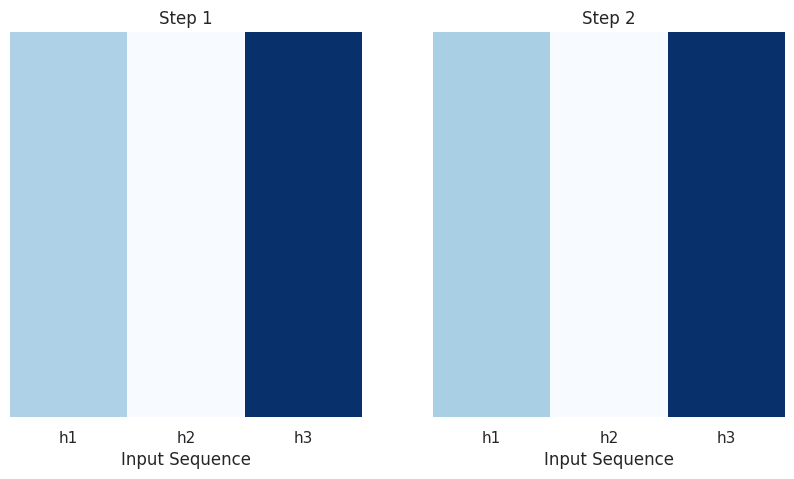

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем параметры для визуализации
sns.set(style="whitegrid")

# Входная последовательность (x1, x2, x3)
X = np.array([[1, 0], [0, 1], [1, 1]])

# Скрытые состояния кодировщика (h1, h2, h3)
H = np.array([[0.5, 0.2], [0.1, 0.4], [0.3, 0.8]])

# Начальное состояние декодера
s_0 = np.array([0.0, 0.0])

# Параметры для вычисления внимания
W_a = np.array([[0.1, 0.2], [0.3, 0.4]])
U_a = np.array([[0.1, 0.0], [0.0, 0.1]])
v_a = np.array([1, 1])

# Параметры декодера
W_s = np.array([[0.5, 0.1], [0.3, 0.7]])
U_s = np.array([0.2, 0.1])
V_s = np.array([[0.1, 0.2], [0.3, 0.4]])

# Параметры выхода
W_o = np.array([[1, -1], [-1, 1]])
b_o = np.array([0.1, 0.2])

# Softmax функция
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Функция вычисления внимания
def attention(s_prev, H):
    e = np.zeros(H.shape[0])
    for t in range(H.shape[0]):
        e[t] = np.dot(v_a, np.tanh(np.dot(W_a, s_prev) + np.dot(U_a, H[t])))
    alpha = softmax(e)
    return alpha

# Функция обновления состояния декодера
def update_decoder_state(s_prev, y_prev, c):
    return np.tanh(np.dot(W_s, s_prev) + U_s * y_prev + np.dot(V_s, c))

# Функция генерации выхода
def generate_output(s):
    return softmax(np.dot(W_o, s) + b_o)

# Механизм внимания и декодирование
def decode(H, s_0, num_steps=2):
    s = s_0
    y_prev = 0  # Начальный вход декодера
    attention_weights = []

    for step in range(num_steps):
        # 1. Вычисляем веса внимания
        alpha = attention(s, H)
        attention_weights.append(alpha)

        # 2. Вычисляем контекстный вектор
        c = np.sum(alpha[:, np.newaxis] * H, axis=0)

        # 3. Обновляем состояние декодера
        s = update_decoder_state(s, y_prev, c)

        # 4. Генерируем выход
        output = generate_output(s)
        y_prev = np.argmax(output)

        print(f"Step {step + 1}:")
        print(f"Attention Weights: {alpha}")
        print(f"Context Vector: {c}")
        print(f"Decoder State: {s}")
        print(f"Generated Output: {y_prev}")
        print("\n")

    return attention_weights

# Запускаем декодирование
attention_weights = decode(H, s_0)

# Визуализация весов внимания
def plot_attention(attention_weights):
    fig, ax = plt.subplots(1, len(attention_weights), figsize=(10, 5))

    for i, weights in enumerate(attention_weights):
        sns.heatmap(weights[np.newaxis, :], cmap='Blues', cbar=False, ax=ax[i])
        ax[i].set_title(f"Step {i + 1}")
        ax[i].set_xlabel("Input Sequence")
        ax[i].set_xticks([0.5, 1.5, 2.5])
        ax[i].set_xticklabels(["h1", "h2", "h3"])
        ax[i].set_yticks([])

    plt.show()

# Визуализируем
plot_attention(attention_weights)



### Заключение

Модель внимания Bahdanau представляет собой мощное расширение для стандартных моделей на основе RNN, предоставляя гибкий механизм для работы с длинными последовательностями и улучшая качество генерации последовательностей.



### Вопросы для самопроверки

1. В чем заключается основная идея механизма внимания в нейронных сетях?
2. Какие задачи решает модель Bahdanau и какие её ключевые особенности?
3. Какое назначение у контекстного вектора в модели внимания?
4. Какие параметры используются в вычислении внимания и как они влияют на результат?
5. Какое уравнение используется для вычисления весов внимания в модели Bahdanau?
6. Как работает softmax и почему он используется для нормализации весов внимания?
7. Как происходит обновление состояния декодера в модели с механизмом внимания?
8. В чем разница между моделью Bahdanau и базовыми рекуррентными нейронными сетями (RNN)?
9. Каково назначение матриц $W_a$, $U_a$ и вектора $v_a$ в механизме внимания?
10. Как используется начальное состояние декодера в вычислении внимания?
11. Чем модель Bahdanau отличается от модели Luong в части механизма внимания?
12. Как контекстный вектор помогает декодеру делать прогнозы на выходе?
13. Почему модель Bahdanau считается улучшенной версией seq2seq-моделей?
14. Какое влияние оказывают параметры $W_s$, $U_s$ и $V_s$ на процесс декодирования?
15. Как можно визуализировать работу механизма внимания? Какую информацию можно получить из тепловых карт (heatmaps)?


### Задачи для самостоятельной работы

1. Дана входная последовательность из 4 векторов и скрытые состояния кодировщика. Вычислите веса внимания для каждого вектора при начальном состоянии декодера.
2. Найдите контекстный вектор для следующего состояния декодера при условии, что известно распределение весов внимания и скрытые состояния кодировщика.
3. Определите следующее состояние декодера $s_1$ для модели Bahdanau, если заданы начальное состояние, предыдущий выход и контекстный вектор.
4. Постройте softmax-распределение для весов внимания, если даны значения $e_1 = 0.3$, $e_2 = 0.7$, $e_3 = 1.0$.
5. Дана матрица $W_a$ и вектор состояния декодера $s_0$. Вычислите значение активации внимания $e_{11}$ для первого скрытого состояния кодировщика.
6. Рассчитайте веса внимания для модели, если скрытые состояния кодировщика заданы в виде $H = \{[0.2, 0.4], [0.5, 0.6], [0.7, 0.1]\}$, а начальное состояние декодера равно нулевому вектору.
7. Изучите, как изменятся веса внимания при изменении матрицы $W_a$, и постройте соответствующую таблицу для нескольких значений.
8. Рассчитайте контекстный вектор $c_2$ на втором шаге декодирования для последовательности из 3 скрытых состояний.
9. Постройте последовательную визуализацию изменения весов внимания для последовательности из 5 скрытых состояний на 4 шагах декодирования.
10. Определите выход декодера $y_1$, если известно состояние $s_1$ и параметры $W_o$, $b_o$.
11. Найдите контекстный вектор для модели внимания, если веса внимания $\alpha = [0.1, 0.3, 0.6]$, а скрытые состояния заданы в виде $H = \{[1.0, 0.5], [0.4, 0.3], [0.2, 0.8]\}$.
12. Как изменится контекстный вектор, если все веса внимания одинаковы? Рассчитайте для последовательности из 3 скрытых состояний.
13. Примените softmax-функцию к распределению из отрицательных значений: $e_1 = -0.5$, $e_2 = -0.1$, $e_3 = -1.0$. Постройте график.
14. Решите задачу декодирования для последовательности длиной 5, сгенерировав выходные токены и промежуточные состояния декодера.
15. Рассчитайте новое состояние декодера $s_2$, если задано состояние $s_1$, выход $y_1 = 0$ и контекстный вектор $c_1 = [0.2, 0.3]$.
16. Визуализируйте динамику весов внимания при декодировании последовательности из 3 скрытых состояний в течение 4 шагов.
17. Определите, как изменится распределение softmax, если одно из значений активации внимания сильно увеличится. Рассчитайте для $e = [0.1, 2.0, 0.5]$.
18. Рассчитайте первое состояние декодера, если начальное состояние $s_0 = [0, 0]$, матрица $W_s = \{[0.2, 0.1], [0.3, 0.4]\}$, контекстный вектор $c_1 = [0.3, 0.2]$.
19. Постройте график зависимости контекстного вектора от изменения весов внимания для последовательности длиной 3.
20. Рассчитайте веса внимания на втором шаге декодирования, если состояние декодера $s_1 = [0.1, 0.2]$ и скрытые состояния кодировщика даны в виде $H = \{[0.5, 0.1], [0.2, 0.3], [0.1, 0.4]\}$.
21. Сравните динамику изменения весов внимания в модели Bahdanau и модели Luong на одном и том же наборе данных.
22. Проведите эксперимент: зафиксируйте одно скрытое состояние кодировщика и изменяйте начальное состояние декодера $s_0$. Как изменятся веса внимания?
23. Постройте график зависимости состояния декодера от контекстного вектора для трёх различных шагов декодирования.
24. Определите изменение весов внимания при изменении параметров матрицы $U_a$. Рассчитайте для последовательности длиной 4.
25. Рассчитайте вес внимания $e_{13}$, если состояние декодера $s_0 = [0.1, 0.2]$, скрытое состояние $h_3 = [0.3, 0.8]$, матрицы $W_a$ и $U_a$ заданы.
26. Решите задачу декодирования для последовательности длиной 6: найдите выходные токены и визуализируйте распределение весов внимания на каждом шаге.
27. Рассчитайте контекстный вектор на третьем шаге декодирования, если задано распределение весов внимания и скрытые состояния.
28. Примените механизм внимания для двух различных начальных состояний декодера и сравните результаты по контекстным векторам.
29. Найдите веса внимания, если известно состояние декодера и скрытые состояния заданы как $h_1 = [0.3, 0.7]$, $h_2 = [0.2, 0.1]$, $h_3 = [0.5, 0.9]$.
30. Проанализируйте, как изменится выход декодера при увеличении значений активации внимания. Рассчитайте для нескольких примеров.



#Модели Luong

Модели Luong (Luong Attention) — это один из методов, используемых в области обработки естественного языка, в частности, в задачах машинного перевода и других задачах, связанных с последовательными данными. Модель Luong, предложенная Minh-Thang Luong и его коллегами, является одним из подходов к механизму внимания (attention mechanism) в рекуррентных нейронных сетях (RNN). В данной лекции мы подробно рассмотрим эту модель, её математическое описание и ключевые формулы.

## 1. Введение в механизм внимания

Перед тем как перейти к моделям Luong, важно понимать, что такое механизм внимания. Механизм внимания позволяет модели сосредоточиться на определённых частях входной последовательности при генерации каждой части выходной последовательности.

### 1.1. Основные компоненты

- **Входная последовательность** $X = (x_1, x_2, \ldots, x_T)$ длиной $T$.
- **Выходная последовательность** $Y = (y_1, y_2, \ldots, y_S)$ длиной $S$.
- **Скрытые состояния** RNN на каждом шаге $t$: $h_t$.

### 1.2. Задача внимания

Задача механизма внимания состоит в том, чтобы вычислить контекстный вектор $c_t$ на каждом шаге генерации $y_t$. Этот вектор содержит информацию о значимости различных входных элементов при формировании текущего выхода $y_t$.

## 2. Модели Luong

Модели Luong представляют собой разновидность механизмов внимания, которые можно разделить на несколько типов: "dot-product" (скалярное произведение), "general" (общее) и "concat" (конкатенация). Рассмотрим каждую из этих моделей.

### 2.1. Скалярное произведение (Dot-product Attention)

В этой модели контекстный вектор вычисляется на основе скалярного произведения скрытого состояния декодера и скрытых состояний энкодера.

#### 2.1.1. Формулы

1. **Вычисление весов внимания**:

$$
e_{tj} = \text{score}(h_t, \overline{h}_j) = h_t^T \overline{h}_j
$$

где:
- $e_{tj}$ — это энергия внимания для текущего выхода $t$ и входа $j$,
- $h_t$ — скрытое состояние декодера на шаге $t$,
- $\overline{h}_j$ — скрытое состояние энкодера на шаге $j$.

2. **Нормализация весов**:

$$
\alpha_{tj} = \frac{\exp(e_{tj})}{\sum_{k=1}^{T} \exp(e_{tk})}
$$

где:
- $\alpha_{tj}$ — вес внимания для входа $j$ на шаге $t$.

3. **Вычисление контекстного вектора**:

$$
c_t = \sum_{j=1}^{T} \alpha_{tj} \overline{h}_j
$$

где $c_t$ — контекстный вектор на шаге $t$.

### 2.2. Общее внимание (General Attention)

В модели общего внимания используется матрица весов $W_a$ для преобразования скрытых состояний перед вычислением скалярного произведения.

#### 2.2.1. Формулы

1. **Преобразование скрытых состояний**:

$$
\tilde{h}_j = W_a \overline{h}_j
$$

где $W_a$ — матрица весов.

2. **Вычисление весов внимания**:

$$
e_{tj} = \text{score}(h_t, \tilde{h}_j) = h_t^T \tilde{h}_j
$$

3. **Нормализация весов и контекстный вектор** остаются аналогичными.

### 2.3. Конкатенация (Concat Attention)

В модели конкатенации скрытое состояние декодера и скрытое состояние энкодера объединяются (конкатенируются) перед вычислением скалярного произведения.

#### 2.3.1. Формулы

1. **Конкатенация**:

$$
\tilde{h}_{tj} = [h_t; \overline{h}_j]
$$

где $[\cdot; \cdot]$ — операция конкатенации.

2. **Вычисление весов внимания**:

$$
e_{tj} = \text{score}(\tilde{h}_{tj}) = v^T \tanh(W_c \tilde{h}_{tj})
$$

где:
- $v$ — вектор весов,
- $W_c$ — матрица весов.

3. **Нормализация весов и контекстный вектор** остаются аналогичными.

## 3. Выход на основе контекста

На основе вычисленного контекстного вектора $c_t$ и скрытого состояния декодера $h_t$ можно сформировать выходной вектор:

$$
y_t = \text{softmax}(W_y [h_t; c_t])
$$

где:
- $W_y$ — матрица весов для генерации выхода,
- $y_t$ — предсказанный выход на шаге $t$.



Давайте рассмотрим числовой пример для модели **Luong с механизмом внимания на основе скалярного произведения (dot-product attention)**. Мы пройдем по всем шагам, начиная с вычисления весов внимания и заканчивая генерацией выходного значения.

## Условия задачи

Предположим, что у нас есть:
- Декодер и энкодер работают с векторами размерности 2.
- Входная последовательность состоит из **трех элементов**: $X = (x_1, x_2, x_3)$.
- Скрытые состояния энкодера на каждом шаге следующие:

$$
\overline{h}_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad \overline{h}_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, \quad \overline{h}_3 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

- Скрытое состояние декодера на текущем шаге $t$ равно:

$$
h_t = \begin{pmatrix} 1 \\ 0.5 \end{pmatrix}
$$

## Шаг 1: Вычисление энергий внимания $e_{tj}$

Механизм внимания на основе скалярного произведения вычисляет энергии внимания для каждого состояния энкодера по формуле:

$$
e_{tj} = h_t^T \overline{h}_j
$$

Для каждого элемента $j$ вычисляем:

1. $e_{t1} = h_t^T \overline{h}_1 = \begin{pmatrix} 1 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 1$
2. $e_{t2} = h_t^T \overline{h}_2 = \begin{pmatrix} 1 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 0 \\ 1 \end{pmatrix} = 0.5$
3. $e_{t3} = h_t^T \overline{h}_3 = \begin{pmatrix} 1 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 1 \end{pmatrix} = 1.5$

Итак, энергии внимания:

$$
e_t = \begin{pmatrix} 1, 0.5, 1.5 \end{pmatrix}
$$

## Шаг 2: Нормализация энергий — вычисление весов внимания $\alpha_{tj}$

Используем softmax для нормализации весов:

$$
\alpha_{tj} = \frac{\exp(e_{tj})}{\sum_{k=1}^{T} \exp(e_{tk})}
$$

1. Сначала вычисляем экспоненты энергий:

$$
\exp(e_{t1}) = \exp(1) \approx 2.718, \quad \exp(e_{t2}) = \exp(0.5) \approx 1.649, \quad \exp(e_{t3}) = \exp(1.5) \approx 4.482
$$

2. Находим сумму экспонент:

$$
\sum_{j=1}^{3} \exp(e_{tj}) = 2.718 + 1.649 + 4.482 = 8.849
$$

3. Теперь можем вычислить нормализованные веса:

$$
\alpha_{t1} = \frac{2.718}{8.849} \approx 0.307, \quad \alpha_{t2} = \frac{1.649}{8.849} \approx 0.186, \quad \alpha_{t3} = \frac{4.482}{8.849} \approx 0.507
$$

Итак, веса внимания:

$$
\alpha_t = \begin{pmatrix} 0.307, 0.186, 0.507 \end{pmatrix}
$$

## Шаг 3: Вычисление контекстного вектора $c_t$

Контекстный вектор вычисляется как взвешенная сумма скрытых состояний энкодера:

$$
c_t = \sum_{j=1}^{T} \alpha_{tj} \overline{h}_j
$$

Рассчитаем каждую компоненту контекстного вектора:

1. $\alpha_{t1} \overline{h}_1 = 0.307 \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0.307 \\ 0 \end{pmatrix}$
2. $\alpha_{t2} \overline{h}_2 = 0.186 \cdot \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0.186 \end{pmatrix}$
3. $\alpha_{t3} \overline{h}_3 = 0.507 \cdot \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \begin{pmatrix} 0.507 \\ 0.507 \end{pmatrix}$

Теперь складываем все компоненты:

$$
c_t = \begin{pmatrix} 0.307 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ 0.186 \end{pmatrix} + \begin{pmatrix} 0.507 \\ 0.507 \end{pmatrix} = \begin{pmatrix} 0.814 \\ 0.693 \end{pmatrix}
$$

Контекстный вектор $c_t$:

$$
c_t = \begin{pmatrix} 0.814 \\ 0.693 \end{pmatrix}
$$

## Шаг 4: Генерация выходного значения $y_t$

На последнем этапе, выходное значение $y_t$ на шаге $t$ вычисляется на основе скрытого состояния декодера $h_t$ и контекстного вектора $c_t$. Выход формируется через полносвязный слой с последующей softmax-активацией:

$$
y_t = \text{softmax}(W_y [h_t; c_t])
$$

Для простоты предположим, что $W_y$ — это просто единичная матрица (без дополнительного взвешивания), и вычислим результат:

1. Конкатенируем векторы $h_t$ и $c_t$:

$$
[h_t; c_t] = \begin{pmatrix} 1 \\ 0.5 \\ 0.814 \\ 0.693 \end{pmatrix}
$$

2. Применяем softmax:

$$
y_t = \text{softmax}\left(\begin{pmatrix} 1 \\ 0.5 \\ 0.814 \\ 0.693 \end{pmatrix}\right)
$$

Для вычисления softmax:

1. Сначала вычисляем экспоненты каждого значения:

$$
\exp(1) \approx 2.718, \quad \exp(0.5) \approx 1.649, \quad \exp(0.814) \approx 2.257, \quad \exp(0.693) \approx 2.0
$$

2. Сумма экспонент:

$$
\sum = 2.718 + 1.649 + 2.257 + 2.0 = 8.624
$$

3. Вычисляем нормализованные значения:

$$
y_{t1} = \frac{2.718}{8.624} \approx 0.315, \quad y_{t2} = \frac{1.649}{8.624} \approx 0.191, \quad y_{t3} = \frac{2.257}{8.624} \approx 0.262, \quad y_{t4} = \frac{2.0}{8.624} \approx 0.232
$$

Итак, выходное значение:

$$
y_t = \begin{pmatrix} 0.315, 0.191, 0.262, 0.232 \end{pmatrix}
$$

Таким образом, мы шаг за шагом прошли через все этапы механизма внимания в модели Luong на основе скалярного произведения. На каждом этапе были применены соответствующие математические операции: вычисление энергий внимания, нормализация весов, вычисление контекстного вектора и генерация выходного значения.



Attention Scores (Energy): [1.  0.5 1.5]
Attention Weights (Normalized): [0.30719589 0.18632372 0.50648039]
Context Vector: [0.81367628 0.69280411]
Output (Softmax probabilities): [0.31525433 0.19121142 0.26166263 0.23187162]


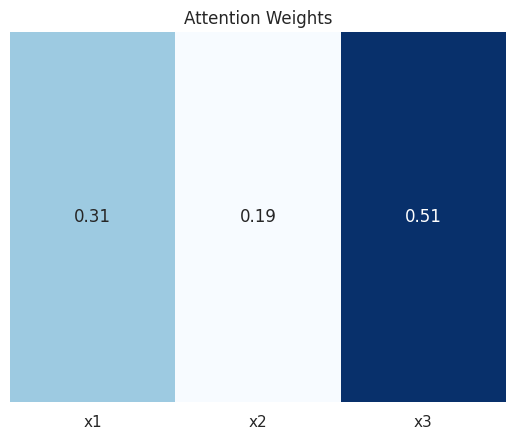

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Входные данные
hidden_encoder_states = np.array([
    [1, 0],   # h_1
    [0, 1],   # h_2
    [1, 1]    # h_3
])

hidden_decoder_state = np.array([1, 0.5])  # h_t

# Шаг 1: Вычисление энергий внимания (скалярное произведение)
def compute_attention_scores(encoder_states, decoder_state):
    scores = np.dot(encoder_states, decoder_state)
    return scores

# Шаг 2: Применение softmax для нормализации
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # для численной стабильности
    return exp_x / exp_x.sum(axis=0)

# Шаг 3: Вычисление контекстного вектора
def compute_context_vector(encoder_states, attention_weights):
    context_vector = np.sum(encoder_states.T * attention_weights, axis=1)
    return context_vector

# Шаг 4: Генерация выходного значения (простое вычисление)
def generate_output(decoder_state, context_vector):
    concatenated = np.concatenate([decoder_state, context_vector])
    output = softmax(concatenated)  # Применяем softmax для генерации вероятностей
    return output

# 1. Вычисляем энергии внимания
attention_scores = compute_attention_scores(hidden_encoder_states, hidden_decoder_state)
print(f"Attention Scores (Energy): {attention_scores}")

# 2. Применяем softmax к энергиям внимания
attention_weights = softmax(attention_scores)
print(f"Attention Weights (Normalized): {attention_weights}")

# 3. Вычисляем контекстный вектор
context_vector = compute_context_vector(hidden_encoder_states, attention_weights)
print(f"Context Vector: {context_vector}")

# 4. Генерация выходного значения
output = generate_output(hidden_decoder_state, context_vector)
print(f"Output (Softmax probabilities): {output}")

# Визуализация весов внимания
def plot_attention(attention_weights):
    fig, ax = plt.subplots()
    sns.heatmap(attention_weights.reshape(1, -1), annot=True, cmap='Blues', cbar=False, ax=ax)
    ax.set_xticklabels(['x1', 'x2', 'x3'])
    ax.set_yticklabels([''])
    ax.set_title("Attention Weights")
    plt.show()

# Визуализируем
plot_attention(attention_weights)


## 4. Заключение

Модели Luong предоставляют эффективный способ использования механизма внимания для обработки последовательных данных в задачах машинного перевода и других областях. Основное преимущество данных моделей заключается в их способности адаптивно фокусироваться на наиболее значимых частях входной последовательности, что улучшает качество генерируемых выходов.

С помощью предложенных формул и подходов можно значительно улучшить производительность нейронных сетей в задачах, связанных с последовательной обработкой данных.



### Вопросы для самопроверки

1. Что такое механизм внимания в контексте нейронных сетей и машинного перевода?
2. Чем отличается механизм внимания Luong от классического внимания Bahdanau?
3. Какие типы механизмов внимания описаны в модели Luong?
4. Какое математическое выражение используется для вычисления энергии внимания в модели Luong на основе скалярного произведения (dot-product attention)?
5. Как нормализуются энергии внимания в модели Luong?
6. Что такое контекстный вектор, и как он вычисляется в модели внимания Luong?
7. В чем разница между моделями Luong с "general" и "dot-product" механизмами внимания?
8. Как вычисляется внимание в модели Luong с механизмом "concat" (конкатенации)?
9. Какие параметры скрытых состояний энкодера и декодера участвуют в механизме внимания?
10. Какое значение принимает функция softmax и почему она используется для нормализации весов внимания?
11. Какие задачи решает механизм внимания в задачах перевода и генерации текста?
12. Как связаны контекстный вектор и выход декодера при генерации итогового выхода?
13. Какое значение имеет матрица $W_a$ в модели Luong с общим вниманием (general attention)?
14. В каких случаях механизм внимания Luong может быть полезнее, чем традиционные RNN и LSTM без внимания?
15. Какие ключевые шаги необходимо выполнить для построения модели внимания Luong?


### Задачи для самостоятельной работы

1. Даны скрытые состояния энкодера $\overline{h}_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \overline{h}_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, \overline{h}_3 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ и состояние декодера $h_t = \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix}$. Вычислите энергии внимания.
   
2. Нормализуйте энергии внимания из задачи 1, используя softmax.

3. Для скрытых состояний энкодера $\overline{h}_1 = \begin{pmatrix} 1 \\ 2 \end{pmatrix}, \overline{h}_2 = \begin{pmatrix} 3 \\ 4 \end{pmatrix}$ и декодера $h_t = \begin{pmatrix} 2 \\ 1 \end{pmatrix}$, вычислите контекстный вектор, используя внимание на основе скалярного произведения.

4. Реализуйте вычисление внимания по модели Luong с общим вниманием (general attention), где матрица $W_a = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$.

5. Пусть скрытые состояния энкодера заданы как $\overline{h}_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \overline{h}_2 = \begin{pmatrix} 2 \\ 3 \end{pmatrix}$, а состояние декодера как $h_t = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$. Используйте модель внимания на основе конкатенации (concat attention), чтобы вычислить вес внимания $e_{tj}$.

6. Напишите функцию для вычисления контекстного вектора в модели Luong с использованием механизма внимания "dot-product" в Python.

7. Даны скрытые состояния энкодера: $\overline{h}_1 = [0.3, 0.6], \overline{h}_2 = [0.1, 0.9], \overline{h}_3 = [0.5, 0.5]$, а состояние декодера: $h_t = [0.4, 0.4]$. Рассчитайте контекстный вектор.

8. Пусть декодер имеет скрытое состояние $h_t = \begin{pmatrix} 1 \\ 0.5 \end{pmatrix}$, а энкодер имеет состояния $\overline{h}_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ и $\overline{h}_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$. Используйте внимание "general attention", где $W_a = \begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix}$.

9. Протестируйте механизм внимания Luong на выборке входных данных размерности 3x2 с различными весами внимания, используя softmax и визуализируя веса на графике.

10. Реализуйте на Python программу для вычисления выхода $y_t$ на основе механизма внимания Luong, начиная с генерации скрытых состояний энкодера и декодера, вычисления энергий внимания и завершая вычислением выходного значения через softmax.

11. Напишите программу, которая принимает на вход скрытые состояния энкодера и декодера, вычисляет веса внимания, контекстный вектор и возвращает визуализацию весов внимания в виде тепловой карты.

12. Рассчитайте веса внимания для декодера с состоянием $h_t = [2, 1]$ и энкодера с состояниями $\overline{h}_1 = [0, 1], \overline{h}_2 = [1, 0]$, используя механизм внимания на основе скалярного произведения.

13. Вычислите контекстный вектор для энкодера с состояниями $\overline{h}_1 = \begin{pmatrix} 0.2 \\ 0.8 \end{pmatrix}, \overline{h}_2 = \begin{pmatrix} 0.9 \\ 0.1 \end{pmatrix}$ и декодера $h_t = \begin{pmatrix} 0.4 \\ 0.6 \end{pmatrix}$ через механизм внимания "dot-product".

14. Вычислите веса внимания и контекстный вектор для последовательности длины 4 и векторов размерности 3.

15. Пусть в модели Luong используется общий механизм внимания с матрицей весов $W_a = \begin{pmatrix} 1 & 0.5 \\ 0.5 & 1 \end{pmatrix}$. Рассчитайте значения $e_{tj}$ для заданных состояний энкодера и декодера.

16. Примените механизм внимания Luong к выборке последовательностей различной длины и сравните полученные контекстные векторы.

17. Для векторов скрытых состояний энкодера и декодера задайте случайные значения и проведите эксперимент по вычислению весов внимания, используя разные виды механизмов внимания (dot-product, general, concat).

18. Напишите функцию для генерации входных и выходных векторов, которая на каждом шаге будет вычислять контекстные векторы с помощью модели внимания Luong.

19. Рассчитайте веса внимания для энкодера с 5 состояниями размерности 4 и декодера с состоянием размерности 4, используя механизм общего внимания.

20. Пусть скрытые состояния декодера задаются как $h_1 = [0.1, 0.5], h_2 = [0.6, 0.7]$, а состояния энкодера $\overline{h}_1 = [1, 0], \overline{h}_2 = [0, 1], \overline{h}_3 = [1, 1]$. Вычислите итоговые контекстные векторы.

21. Для механизма внимания "general attention" реализуйте программу на Python, которая вычисляет веса внимания для входных векторов различной размерности.

22. Постройте график, показывающий зависимость итогового контекстного вектора от изменения весов внимания.

23. Реализуйте генерацию выходных значений для последовательностей длины 5, где каждый шаг основан на механизме внимания Luong.

24. Задайте состояние декодера $h_t = [0.3, 0.7]$ и вычислите веса внимания и контекстный вектор для энкодера с состояниями $\overline{h}_1 = [0.6, 0.2], \overline{h}_2 = [0.4, 0.9]$.

25. Используя модель внимания "concat attention", напишите программу для вычисления весов для случайных векторов длины 4.

26. Протестируйте производительность механизма внимания для векторов скрытых состояний разной размерности, начиная от 2 и выше.

27. Реализуйте алгоритм вычисления весов внимания для декодера и энкодера, который на каждом шаге будет выводить промежуточные результаты (энергии, веса и контекстный вектор).

28. Для модели Luong реализуйте функцию, которая на основе входных последовательностей и заданных состояний декодера и энкодера вычисляет контекстный вектор и возвращает его.

29. Напишите программу, которая сравнивает производительность различных механизмов внимания (dot-product, general, concat) на одной и той же выборке данных, визуализируя результаты.

30. Реализуйте механизм внимания, который будет учитывать дополнительные параметры, такие как длина последовательности и размерность скрытых состояний, и протестируйте его на реальных данных.